In [1]:
import time
t0 = time.time()
from tqdm import tqdm
import os
import random
from subprocess import check_output


import pandas as pd
import numpy as np
import seaborn as sns
import pickle
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('adult.csv')

In [3]:
df.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K
32560,52,Self-emp-inc,287927,HS-grad,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,>50K


In [80]:
df.shape

(32561, 16)

In [4]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education-num     0
marital-status    0
occupation        0
relationship      0
race              0
sex               0
capital-gain      0
capital-loss      0
hours-per-week    0
country           0
salary            0
dtype: int64

In [5]:
df.corr()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
age,1.000000,-0.076646,0.036527,0.077674,0.057775,0.068756
fnlwgt,-0.076646,1.000000,-0.043195,0.000432,-0.010252,-0.018768
education-num,0.036527,-0.043195,1.000000,0.122630,0.079923,0.148123
capital-gain,0.077674,0.000432,0.122630,1.000000,-0.031615,0.078409
capital-loss,0.057775,-0.010252,0.079923,-0.031615,1.000000,0.054256
hours-per-week,0.068756,-0.018768,0.148123,0.078409,0.054256,1.000000


In [6]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'country', 'salary'],
      dtype='object')

In [7]:
categorical_features=[feature for feature in df.columns if df[feature].dtype=='O' ]

In [8]:
numerical_features = [feature for feature in df.columns if df[feature].dtypes != 'O']

In [9]:
categorical_features

['workclass',
 'education',
 'marital-status',
 'occupation',
 'relationship',
 'race',
 'sex',
 'country',
 'salary']

In [10]:
numerical_features

['age',
 'fnlwgt',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week']

In [11]:
df['target']=[1 if '>' in i else 0 for i in df['salary']  ]

In [12]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [13]:
df.workclass.value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

<AxesSubplot:ylabel='Frequency'>

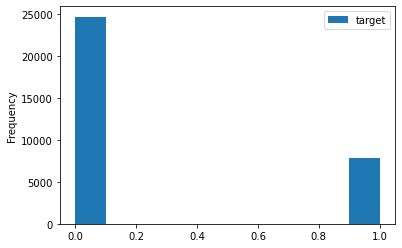

In [14]:
df.plot(kind='hist',y='target')

<AxesSubplot:xlabel='workclass', ylabel='count'>

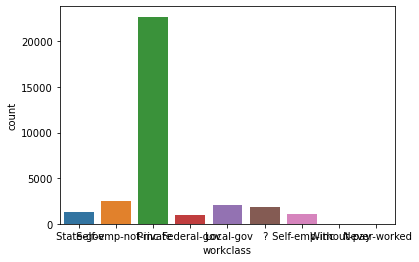

In [15]:
sns.countplot(x='workclass',data=df)

<AxesSubplot:xlabel='workclass', ylabel='target'>

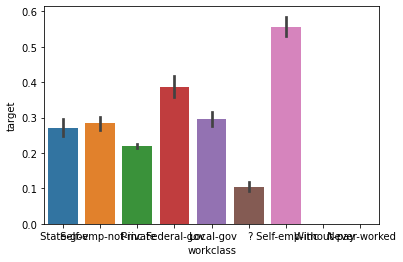

In [16]:
sns.barplot(x='workclass',y='target',hue=None,data=df)

<AxesSubplot:xlabel='workclass', ylabel='count'>

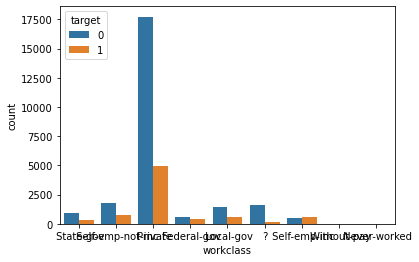

In [17]:
sns.countplot(x='workclass',y=None,hue='target',data=df)

In [18]:
df1=df[df['workclass']!=' ?']

In [19]:
df1.shape

(30725, 16)

In [20]:
df1.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' Self-emp-inc', ' Without-pay', ' Never-worked'],
      dtype=object)

In [21]:
df1['education-num'].unique()

array([13,  9,  7, 14,  5, 10, 12, 11,  4, 16, 15,  3,  6,  1,  8,  2],
      dtype=int64)

In [22]:
df1['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [23]:
df1['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
 ?                       7
Name: occupation, dtype: int64

In [24]:
df2=df1[df1['occupation']!=' ?']

In [25]:
df2.shape

(30718, 16)

In [26]:
df1['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [27]:
df1['race'].value_counts()

 White                 26306
 Black                  2911
 Asian-Pac-Islander      974
 Amer-Indian-Eskimo      286
 Other                   248
Name: race, dtype: int64

<AxesSubplot:xlabel='race', ylabel='count'>

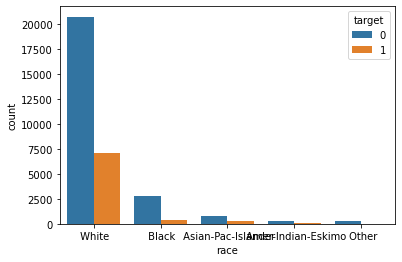

In [28]:
sns.countplot(x='race',hue='target',data=df)

In [29]:
df1['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [30]:
df1['sex'].value_counts()

 Male      20793
 Female     9932
Name: sex, dtype: int64

In [31]:
df1['capital-gain'].unique()

array([ 2174,     0, 14084,  5178,  5013,  2407, 14344, 15024,  7688,
        4064,  4386,  7298,  1409,  3674,  1055,  2050,  2176,   594,
       20051,  6849,  4101,  8614,  3411,  2597, 25236,  4650,  9386,
        2463,  3103, 10605,  2964,  3325,  2580,  3471,  4865, 99999,
        6514,  1471,  2329,  2105,  2885, 10520,  2202,  2961, 27828,
        6767,  2228,  1506, 13550,  2635,  5556,  4787,  3781,  3137,
        3818,   914,   401,  2829,  2977,  4934,  2062,  2354,  3464,
        5455, 15020,  1424,  3273, 22040,  4416, 10566,  4931,  7430,
       34095,  6497,  3908,   114,  7896,  2346,  2907,  1151,  2414,
        2290,  3418, 15831, 41310,  4508,  2538,  3456,  1848,  3887,
        5721,  9562,  6418,  1455,  2036,  3942,  1831, 11678,  2936,
        2993,  7443,  6360,  4687,  1797,  6723,  2009,  3432,  6097,
        1639,  2653, 18481, 25124,  7978,   991,  1173,  2387,  5060,
        1086], dtype=int64)

In [32]:
df1['capital-loss'].unique()

array([   0, 2042, 1408, 1902, 1573, 1887, 1719, 1762, 1564, 2179, 1816,
       1980, 1977, 1876, 1340, 2206, 1741, 1485, 2339, 2415, 1380, 1721,
       2051, 2377, 1669, 2352, 1672,  653, 2392, 1504, 1590, 1651, 1628,
       1848, 2001, 1740, 2002, 1579, 2258, 1602, 2547, 2205, 1726, 2444,
       1138, 2238,  625,  213, 1539,  880, 1668, 1092, 1594, 3004, 2231,
       1844,  810, 2824, 2559, 2057, 1974,  974, 2174, 2149, 1735, 1258,
       2129, 2603, 2282,  323, 2246, 1617, 1648, 1825, 3770, 1755, 3683,
       4356, 2267, 2080, 2457,  419,  155, 3900, 2201, 1944, 2467, 2754,
       2472, 1411], dtype=int64)

In [33]:
df2['hours-per-week'].unique()

array([40, 13, 16, 45, 50, 80, 30, 35, 60, 20, 52, 44, 15, 25, 38, 43, 55,
       48, 58, 32, 70, 22, 56, 41, 28, 36, 24, 46,  2, 42, 12, 65,  1, 34,
       75, 98, 33, 54, 10,  6, 64, 19, 18, 72,  8,  9, 47, 37, 21, 26, 14,
        5, 59,  7, 99, 53, 39, 62, 57, 78, 90, 66, 11, 49, 84,  4, 17, 68,
        3, 27, 85, 31, 51, 77, 63, 23, 87, 88, 73, 89, 97, 94, 29, 96, 67,
       82, 86, 91, 81, 76, 92, 61, 74, 95], dtype=int64)

In [34]:
df2['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' ?', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [35]:
df2['country'].value_counts()

 United-States                 27504
 Mexico                          610
 ?                               556
 Philippines                     188
 Germany                         128
 Puerto-Rico                     109
 Canada                          107
 El-Salvador                     100
 India                           100
 Cuba                             92
 England                          86
 Jamaica                          80
 South                            71
 Italy                            68
 China                            68
 Dominican-Republic               67
 Vietnam                          64
 Guatemala                        63
 Japan                            59
 Poland                           56
 Columbia                         56
 Haiti                            42
 Taiwan                           42
 Iran                             42
 Portugal                         34
 Nicaragua                        33
 Peru                             30
 

In [36]:
df3=df2[df2['country']!=' ?']

In [37]:
df3.shape

(30162, 16)

In [38]:
df3

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,salary,target
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K,0
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K,0
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K,0
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K,0
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K,0
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K,1
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K,0
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K,0


In [39]:
df3.drop(['fnlwgt','education','salary'],axis=1,inplace=True)

C:\Users\Bhaskar\anaconda3\lib\site-packages\pandas\core\frame.py:4163: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [40]:
df3

,age,workclass,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,country,target
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0


In [41]:
work=pd.get_dummies(df3.workclass,drop_first=True)
work

,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,Without-pay
0,0,0,0,0,1,0
1,0,0,0,1,0,0
2,0,1,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
32556,0,1,0,0,0,0
32557,0,1,0,0,0,0
32558,0,1,0,0,0,0
32559,0,1,0,0,0,0


In [42]:
marital=pd.get_dummies(df3['marital-status'],drop_first=True)
marital

,Married-AF-spouse,Married-civ-spouse,Married-spouse-absent,Never-married,Separated,Widowed
0,0,0,0,1,0,0
1,0,1,0,0,0,0
2,0,0,0,0,0,0
3,0,1,0,0,0,0
4,0,1,0,0,0,0
...,...,...,...,...,...,...
32556,0,1,0,0,0,0
32557,0,1,0,0,0,0
32558,0,0,0,0,0,1
32559,0,0,0,1,0,0


In [43]:
occupation=pd.get_dummies(df3['occupation'],drop_first=True)
occupation

,Armed-Forces,Craft-repair,Exec-managerial,Farming-fishing,Handlers-cleaners,Machine-op-inspct,Other-service,Priv-house-serv,Prof-specialty,Protective-serv,Sales,Tech-support,Transport-moving
0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,1,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,0,1,0
32557,0,0,0,0,0,1,0,0,0,0,0,0,0
32558,0,0,0,0,0,0,0,0,0,0,0,0,0
32559,0,0,0,0,0,0,0,0,0,0,0,0,0


In [44]:
relation=pd.get_dummies(df3['relationship'],drop_first=True)
relation

,Not-in-family,Other-relative,Own-child,Unmarried,Wife
0,1,0,0,0,0
1,0,0,0,0,0
2,1,0,0,0,0
3,0,0,0,0,0
4,0,0,0,0,1
...,...,...,...,...,...
32556,0,0,0,0,1
32557,0,0,0,0,0
32558,0,0,0,1,0
32559,0,0,1,0,0


In [45]:
race=pd.get_dummies(df3.race,drop_first=True)
race

,Asian-Pac-Islander,Black,Other,White
0,0,0,0,1
1,0,0,0,1
2,0,0,0,1
3,0,1,0,0
4,0,1,0,0
...,...,...,...,...
32556,0,0,0,1
32557,0,0,0,1
32558,0,0,0,1
32559,0,0,0,1


In [46]:
sex=pd.get_dummies(df3.sex,drop_first=True)
sex

,Male
0,1
1,1
2,1
3,1
4,0
...,...
32556,0
32557,1
32558,0
32559,1


In [47]:
country=pd.get_dummies(df3.country,drop_first=True)
country

,Canada,China,Columbia,Cuba,Dominican-Republic,Ecuador,El-Salvador,England,France,Germany,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32557,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32558,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
32559,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [48]:
final=pd.concat([df3,work,marital,occupation,relation,race,sex,country],axis=1)

In [49]:
final.shape

(30162, 88)

In [50]:
final.drop(['workclass','marital-status','occupation','relationship','race','sex','country'],axis=1,inplace=True)

In [51]:
final.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'target', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Male', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',

In [52]:
final.shape

(30162, 81)

In [53]:
final.target.value_counts()

0    22654
1     7508
Name: target, dtype: int64

In [54]:
x=final.drop(['target'],axis=1)

In [55]:
x.shape

(30162, 80)

In [56]:
x.head(5)

,age,education-num,capital-gain,capital-loss,hours-per-week,Local-gov,Private,Self-emp-inc,Self-emp-not-inc,State-gov,...,Portugal,Puerto-Rico,Scotland,South,Taiwan,Thailand,Trinadad&Tobago,United-States,Vietnam,Yugoslavia
0,39,13,2174,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,1,0,0
1,50,13,0,0,13,0,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
2,38,9,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,53,7,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,28,13,0,0,40,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [57]:
y=final.target

In [58]:
y.shape

(30162,)

In [59]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.7)


In [61]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC

#from xgboost import XGBRegressor
#from sklearn.linear_model import Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
        
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'C': [1.0,2.0],'max_iter':[2000]
            }
        },
        'randomforestclassifier' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [400],
                'criterion': ['gini','entropy']
            }
        },
        'naive_bayes-MultinomialNB' : {
            'model': MultinomialNB(),
            'params': {
                'alpha': [1.0,2.0]
            }
        },
        'naive_bayes-BernoulliNB' : {
            'model': BernoulliNB(),
            'params': {
                'alpha': [1.0,2.0]
            }
        },
        'naive_bayes-GaussianNB' : {
            'model': GaussianNB(),
            'params': {
                'priors': [None]
            }
        },
        'KNeighborsClassifier' : {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [1,2,3]
            }
        },'supportvectormachine' : {
            'model': SVC(),
            'params': {
                'C': [1.0,2.0],'kernel':['rbf']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])



C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

KeyboardInterrupt: 

In [60]:
from sklearn.ensemble import RandomForestClassifier

model=RandomForestClassifier(n_estimators=400,criterion='gini')
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=400)

In [61]:
model.score(x_train,y_train)

0.9787334817411074

In [62]:
y_predicted=model.predict(x_test)

In [63]:
model.score(x_test,y_test)

0.8473864515416069

In [64]:
model.score(x_test,y_predicted)

1.0

In [65]:
from sklearn.metrics import confusion_matrix


s=confusion_matrix(y_test, y_predicted, labels=None, sample_weight=None, normalize=None)

Text(33.0, 0.5, 'True label')

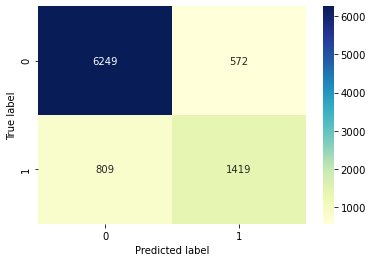

In [66]:
sns.heatmap(pd.DataFrame(s), annot=True, cmap="YlGnBu" ,fmt='g')
plt.xlabel('Predicted label')
plt.ylabel('True label')

In [67]:
from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, y_predicted))
print('MSE:', metrics.mean_squared_error(y_test, y_predicted))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_predicted)))

MAE: 0.1526135484583932
MSE: 0.1526135484583932
RMSE: 0.390657840646253


In [68]:
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test,y_predicted)
acc_score

0.8473864515416069

In [69]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
print ('-'*40)
print ('Accuracy score:')
print (accuracy_score(y_test,y_predicted))
print ('-'*40)
print ('Confusion Matrix:')
print (confusion_matrix(y_test,y_predicted))
print ('-'*40)
print ('Classification Matrix:')
print (classification_report(y_test,y_predicted))

----------------------------------------
Accuracy score:
0.8473864515416069
----------------------------------------
Confusion Matrix:
[[6249  572]
 [ 809 1419]]
----------------------------------------
Classification Matrix:
              precision    recall  f1-score   support

           0       0.89      0.92      0.90      6821
           1       0.71      0.64      0.67      2228

    accuracy                           0.85      9049
   macro avg       0.80      0.78      0.79      9049
weighted avg       0.84      0.85      0.84      9049



In [70]:
with open('model.pkl','wb') as file:
    pickle.dump(model,file)

In [71]:
with open('model.pkl','rb') as file:
    m=pickle.load(file)

In [72]:
m.predict(x_test)

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [73]:
columns=[i for i in x.columns]

In [74]:
#columns

In [75]:
pd.DataFrame(columns).to_csv('col.csv')

In [76]:
d=pd.read_csv('col.csv')

In [77]:
s=d.iloc[:,1]

In [78]:
s[0]

'age'

In [79]:
t1 = time.time()
print(t1-t0, "seconds wall time")

133.29814291000366 seconds wall time


# END

In [2]:
a=5
a.isdigit()

AttributeError: 'int' object has no attribute 'isdigit'

In [23]:
def check_int(a):
    if not a.isdigit():
        print('enter digit')

In [24]:
def main():
    age=input('Enter Ag')
    check_int(age)
    capital-gain=input('Enter capital-gain')
    check_int(capital-gain)
    capital-loss=input('Enter capital-loss')
    check_int(capital-loss)
    Hours-per-weeks=input('Enter Hours-per-weeks')
    check_int(Hours-per-weeks)
    
    

In [25]:
main()

Enter Ag5


In [123]:

lo = SVC()
score = cross_val_score(lo, x_train, y_train)


print(np.mean(score))

0.797186383066362


In [95]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBRegressor
#from sklearn.linear_model import Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
        
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'C': [2],'max_iter':[2000]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train,y_train)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

,model,best_score,best_params
0,logistic_regression,0.850485,"{'C': 2, 'max_iter': 2000}"


In [103]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBRegressor
#from sklearn.linear_model import Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
      
        'randomforestclassifier' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [400],
                'criterion': ['gini']
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train,y_train)

,model,best_score,best_params
0,randomforestclassifier,0.853138,"{'criterion': 'gini', 'n_estimators': 400}"


In [106]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBRegressor
#from sklearn.linear_model import Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
        
        'naive_bayes-GaussianNB' : {
            'model': GaussianNB(),
            'params': {
                'priors': [None]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train,y_train)

,model,best_score,best_params
0,naive_bayes-GaussianNB,0.814871,{'priors': None}


In [107]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBRegressor
#from sklearn.linear_model import Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
        
        'KNeighborsClassifier' : {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [1,2,3]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train,y_train)

,model,best_score,best_params
0,KNeighborsClassifier,0.837319,{'n_neighbors': 2}


In [108]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier

#from xgboost import XGBRegressor
#from sklearn.linear_model import Ridge
#from sklearn.ensemble import RandomForestRegressor
#from sklearn.neighbors import KNeighborsRegressor
#from sklearn.svm import SVR
#from sklearn.linear_model import Lasso
#from sklearn.tree import DecisionTreeRegressor



from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

def find_best_model_using_gridsearchcv(x,y):
    algos = { 
        
        'logistic_regression' : {
            'model': LogisticRegression(),
            'params': {
                'C': [1.0,2.0],'max_iter':[2000]
            }
        },
        'randomforestclassifier' : {
            'model': RandomForestClassifier(),
            'params': {
                'n_estimators': [400],
                'criterion': ['gini','entropy']
            }
        },
        'naive_bayes-MultinomialNB' : {
            'model': MultinomialNB(),
            'params': {
                'alpha': [1.0,2.0]
            }
        },
        'naive_bayes-BernoulliNB' : {
            'model': BernoulliNB(),
            'params': {
                'alpha': [1.0,2.0]
            }
        },
        'naive_bayes-GaussianNB' : {
            'model': GaussianNB(),
            'params': {
                'priors': [None]
            }
        },
        'KNeighborsClassifier' : {
            'model': KNeighborsClassifier(),
            'params': {
                'n_neighbors': [1,2,3]
            }
        }
    }
    scores = []
    cv = ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs =  GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(x,y)
        scores.append({
            'model': algo_name,
            'best_score': gs.best_score_,
            'best_params': gs.best_params_
        })

    return pd.DataFrame(scores,columns=['model','best_score','best_params'])

find_best_model_using_gridsearchcv(x_train,y_train)

C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Bhaskar\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_i

,model,best_score,best_params
0,logistic_regression,0.850485,"{'C': 2.0, 'max_iter': 2000}"
1,randomforestclassifier,0.852996,"{'criterion': 'entropy', 'n_estimators': 400}"
2,naive_bayes-MultinomialNB,0.772863,{'alpha': 1.0}
3,naive_bayes-BernoulliNB,0.770353,{'alpha': 1.0}
4,naive_bayes-GaussianNB,0.814871,{'priors': None}
5,KNeighborsClassifier,0.837319,{'n_neighbors': 2}


In [222]:
from sklearn.ensemble import RandomForestClassifier

In [ ]:
model=RandomForestClassifier()

In [223]:
from sklearn.naive_bayes import MultinomialNB
model=MultinomialNB()

In [224]:
from sklearn.naive_bayes import BernoulliNB
model=BernoulliNB()

In [414]:
from sklearn.naive_bayes import GaussianNB
model=GaussianNB()

In [84]:
b=[]
for i in set(a):
    b.append(f'<option value={i}>{i}</option>')
    

In [85]:
<option value="Petrol">Petrol</option>

SyntaxError: invalid syntax (<ipython-input-85-fb402914e748>, line 1)

In [86]:
b

['<option value= Self-emp-not-inc> Self-emp-not-inc</option>',
 '<option value= Local-gov> Local-gov</option>',
 '<option value= Self-emp-inc> Self-emp-inc</option>',
 '<option value= Private> Private</option>',
 '<option value= State-gov> State-gov</option>',
 '<option value= Federal-gov> Federal-gov</option>',
 '<option value= Without-pay> Without-pay</option>',
 '<option value= Never-worked> Never-worked</option>',
 '<option value=unknown>unknown</option>']

In [87]:
' '.join(b)

'<option value= Self-emp-not-inc> Self-emp-not-inc</option> <option value= Local-gov> Local-gov</option> <option value= Self-emp-inc> Self-emp-inc</option> <option value= Private> Private</option> <option value= State-gov> State-gov</option> <option value= Federal-gov> Federal-gov</option> <option value= Without-pay> Without-pay</option> <option value= Never-worked> Never-worked</option> <option value=unknown>unknown</option>'

In [88]:
c=df['marital-status'].to_list()
d=[]
for i in set(c):
    d.append(f'<option value={i}>{i}</option>')
' '.join(d)   

'<option value= Widowed> Widowed</option> <option value= Married-AF-spouse> Married-AF-spouse</option> <option value= Separated> Separated</option> <option value= Married-spouse-absent> Married-spouse-absent</option> <option value= Never-married> Never-married</option> <option value= Married-civ-spouse> Married-civ-spouse</option> <option value= Divorced> Divorced</option>'

In [149]:
e=df2['occupation'].to_list()
f=[]
for i in set(e):
    f.append(f'<option value={i}>{i}</option>')
' '.join(f) 

'<option value= Protective-serv> Protective-serv</option> <option value= Farming-fishing> Farming-fishing</option> <option value= Tech-support> Tech-support</option> <option value= Other-service> Other-service</option> <option value= Priv-house-serv> Priv-house-serv</option> <option value= Armed-Forces> Armed-Forces</option> <option value= Handlers-cleaners> Handlers-cleaners</option> <option value= Transport-moving> Transport-moving</option> <option value= Prof-specialty> Prof-specialty</option> <option value= Exec-managerial> Exec-managerial</option> <option value= Sales> Sales</option> <option value= Machine-op-inspct> Machine-op-inspct</option> <option value= Adm-clerical> Adm-clerical</option> <option value= Craft-repair> Craft-repair</option>'

In [90]:
g=df['relationship'].to_list()
h=[]
for i in set(g):
    h.append(f'<option value={i}>{i}</option>')
' '.join(h) 

'<option value= Husband> Husband</option> <option value= Own-child> Own-child</option> <option value= Unmarried> Unmarried</option> <option value= Not-in-family> Not-in-family</option> <option value= Wife> Wife</option> <option value= Other-relative> Other-relative</option>'

In [94]:
j=df['race'].to_list()
k=[]
for i in set(j):
    k.append(f'<option value={i}>{i}</option>')
' '.join(k) 

'<option value= Black> Black</option> <option value= Amer-Indian-Eskimo> Amer-Indian-Eskimo</option> <option value= White> White</option> <option value= Other> Other</option> <option value= Asian-Pac-Islander> Asian-Pac-Islander</option>'

In [92]:
l=df['sex'].to_list()
m=[]
for i in set(l):
    m.append(f'<option value={i}>{i}</option>')
' '.join(m) 

'<option value= Female> Female</option> <option value= Male> Male</option>'

In [93]:
n=df['country'].to_list()
o=[]
for i in set(n):
    o.append(f'<option value={i}>{i}</option>')
' '.join(o) 

'<option value= Dominican-Republic> Dominican-Republic</option> <option value= Nicaragua> Nicaragua</option> <option value= Vietnam> Vietnam</option> <option value= United-States> United-States</option> <option value= Guatemala> Guatemala</option> <option value= Yugoslavia> Yugoslavia</option> <option value= England> England</option> <option value= Mexico> Mexico</option> <option value= Holand-Netherlands> Holand-Netherlands</option> <option value= Puerto-Rico> Puerto-Rico</option> <option value= Canada> Canada</option> <option value= Poland> Poland</option> <option value= Outlying-US(Guam-USVI-etc)> Outlying-US(Guam-USVI-etc)</option> <option value= Cambodia> Cambodia</option> <option value= Taiwan> Taiwan</option> <option value= China> China</option> <option value= Trinadad&Tobago> Trinadad&Tobago</option> <option value= Greece> Greece</option> <option value= Philippines> Philippines</option> <option value= Laos> Laos</option> <option value= Haiti> Haiti</option> <option value= Irela

In [150]:
e=df2['workclass'].to_list()
f=[]
for i in set(e):
    f.append(f'<option value={i}>{i}</option>')
' '.join(f) 

'<option value= Self-emp-inc> Self-emp-inc</option> <option value= Without-pay> Without-pay</option> <option value= State-gov> State-gov</option> <option value= Self-emp-not-inc> Self-emp-not-inc</option> <option value= Private> Private</option> <option value= Federal-gov> Federal-gov</option> <option value= Local-gov> Local-gov</option>'

In [124]:
b=x.iloc[0,:].to_list()
len(b)

80

In [74]:
m.predict([[39,
 13,
 2174,
 0,
 40,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0]])[0]

0

In [73]:
columns=pd.read_csv('col.csv')
a=pd.DataFrame(columns)
#b=a.iloc[:,1].to_list().replace(' ','')

b=[i.replace(' ','') for i in a.iloc[:,1].to_list()]
#v=list(int(np.zeros(len(b))))
v=[0 for i in range (len(b))]
v

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [76]:
m.predict([v])[0]

0

In [71]:
v[0]=150

In [160]:
v[b.index('age')]=450

In [161]:
d

[0]

In [162]:
k=[]
for i in range (0,len(b)):
    k.append(b[i].replace(' ',''))
    

In [163]:
k

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife',
 'Asian-Pac-Islander',
 'Black',
 'Other',
 'White',
 'Male',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(G

In [164]:
b[12].replace(' ','')

'Married-civ-spouse'

In [165]:
b

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife',
 'Asian-Pac-Islander',
 'Black',
 'Other',
 'White',
 'Male',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(G

In [122]:
workclass=' Local-gov'
v[b.index(workclass)]=153

In [188]:
v

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]

In [106]:
b[columns.index(age)]=age

NameError: name 'age' is not defined

In [135]:
x_train.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Male', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' 

In [167]:
df.workclass.unique()

array([' State-gov', ' Self-emp-not-inc', ' Private', ' Federal-gov',
       ' Local-gov', ' ?', ' Self-emp-inc', ' Without-pay',
       ' Never-worked'], dtype=object)

In [173]:
df3['marital-status'].unique()

array([' Never-married', ' Married-civ-spouse', ' Divorced',
       ' Married-spouse-absent', ' Separated', ' Married-AF-spouse',
       ' Widowed'], dtype=object)

In [174]:
df3['occupation'].unique()

array([' Adm-clerical', ' Exec-managerial', ' Handlers-cleaners',
       ' Prof-specialty', ' Other-service', ' Sales', ' Transport-moving',
       ' Farming-fishing', ' Machine-op-inspct', ' Tech-support',
       ' Craft-repair', ' Protective-serv', ' Armed-Forces',
       ' Priv-house-serv'], dtype=object)

In [179]:
df3['relationship'].unique()

array([' Not-in-family', ' Husband', ' Wife', ' Own-child', ' Unmarried',
       ' Other-relative'], dtype=object)

In [180]:
df3['race'].unique()

array([' White', ' Black', ' Asian-Pac-Islander', ' Amer-Indian-Eskimo',
       ' Other'], dtype=object)

In [181]:
df3['sex'].unique()

array([' Male', ' Female'], dtype=object)

In [182]:
df3['country'].unique()

array([' United-States', ' Cuba', ' Jamaica', ' India', ' Mexico',
       ' Puerto-Rico', ' Honduras', ' England', ' Canada', ' Germany',
       ' Iran', ' Philippines', ' Poland', ' Columbia', ' Cambodia',
       ' Thailand', ' Ecuador', ' Laos', ' Taiwan', ' Haiti', ' Portugal',
       ' Dominican-Republic', ' El-Salvador', ' France', ' Guatemala',
       ' Italy', ' China', ' South', ' Japan', ' Yugoslavia', ' Peru',
       ' Outlying-US(Guam-USVI-etc)', ' Scotland', ' Trinadad&Tobago',
       ' Greece', ' Nicaragua', ' Vietnam', ' Hong', ' Ireland',
       ' Hungary', ' Holand-Netherlands'], dtype=object)

In [251]:
m.predict([v])

array([0], dtype=int64)

In [84]:
len(columns.iloc[:,1].to_list())

80

In [83]:
len(x.columns)

80

In [85]:
x.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Male', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' 

In [6]:
p=df.education.unique()

In [7]:
p

array([' Bachelors', ' HS-grad', ' 11th', ' Masters', ' 9th',
       ' Some-college', ' Assoc-acdm', ' Assoc-voc', ' 7th-8th',
       ' Doctorate', ' Prof-school', ' 5th-6th', ' 10th', ' 1st-4th',
       ' Preschool', ' 12th'], dtype=object)

In [8]:
q=df['education-num']

In [9]:
dic={}
for i,j in zip(p,q):
    dic[i.replace(' ','')]=j

In [10]:
dic

{'Bachelors': 13,
 'HS-grad': 13,
 '11th': 9,
 'Masters': 7,
 '9th': 13,
 'Some-college': 14,
 'Assoc-acdm': 5,
 'Assoc-voc': 9,
 '7th-8th': 14,
 'Doctorate': 13,
 'Prof-school': 10,
 '5th-6th': 13,
 '10th': 13,
 '1st-4th': 12,
 'Preschool': 11,
 '12th': 4}

In [12]:
with open('dict.pkl','wb') as f:
    pickle.dump(dic,f)

In [13]:
with open('dict.pkl','rb') as g:
    h= pickle.load(g)

In [14]:
h

{'Bachelors': 13,
 'HS-grad': 13,
 '11th': 9,
 'Masters': 7,
 '9th': 13,
 'Some-college': 14,
 'Assoc-acdm': 5,
 'Assoc-voc': 9,
 '7th-8th': 14,
 'Doctorate': 13,
 'Prof-school': 10,
 '5th-6th': 13,
 '10th': 13,
 '1st-4th': 12,
 'Preschool': 11,
 '12th': 4}

AttributeError: 'dict_keys' object has no attribute 'to_list'

In [107]:
l.to_list()

AttributeError: 'dict_keys' object has no attribute 'to_list'

In [117]:

v=[]
for i in p:
    v.append(f'<option value={i}>{i}</option>')
' '.join(v) 

'<option value= Bachelors> Bachelors</option> <option value= HS-grad> HS-grad</option> <option value= 11th> 11th</option> <option value= Masters> Masters</option> <option value= 9th> 9th</option> <option value= Some-college> Some-college</option> <option value= Assoc-acdm> Assoc-acdm</option> <option value= Assoc-voc> Assoc-voc</option> <option value= 7th-8th> 7th-8th</option> <option value= Doctorate> Doctorate</option> <option value= Prof-school> Prof-school</option> <option value= 5th-6th> 5th-6th</option> <option value= 10th> 10th</option> <option value= 1st-4th> 1st-4th</option> <option value= Preschool> Preschool</option> <option value= 12th> 12th</option>'

In [103]:
x.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', ' Local-gov', ' Private', ' Self-emp-inc',
       ' Self-emp-not-inc', ' State-gov', ' Without-pay', ' Married-AF-spouse',
       ' Married-civ-spouse', ' Married-spouse-absent', ' Never-married',
       ' Separated', ' Widowed', ' Armed-Forces', ' Craft-repair',
       ' Exec-managerial', ' Farming-fishing', ' Handlers-cleaners',
       ' Machine-op-inspct', ' Other-service', ' Priv-house-serv',
       ' Prof-specialty', ' Protective-serv', ' Sales', ' Tech-support',
       ' Transport-moving', ' Not-in-family', ' Other-relative', ' Own-child',
       ' Unmarried', ' Wife', ' Asian-Pac-Islander', ' Black', ' Other',
       ' White', ' Male', ' Canada', ' China', ' Columbia', ' Cuba',
       ' Dominican-Republic', ' Ecuador', ' El-Salvador', ' England',
       ' France', ' Germany', ' Greece', ' Guatemala', ' Haiti',
       ' Holand-Netherlands', ' Honduras', ' Hong', ' Hungary', ' India',
       ' 

In [81]:
columns=pd.read_csv('col.csv')
a=pd.DataFrame(columns)
#b=a.iloc[:,1].to_list()
b=[i.replace(' ','') for i in a.iloc[:,1].to_list()]

#v=list(np.zeros(len(b)))
v=[0 for i in range (len(b))]

In [82]:
a

,Unnamed: 0,0
0,0,age
1,1,education-num
2,2,capital-gain
3,3,capital-loss
4,4,hours-per-week
...,...,...
75,75,Thailand
76,76,Trinadad&Tobago
77,77,United-States
78,78,Vietnam


In [83]:
b

['age',
 'education-num',
 'capital-gain',
 'capital-loss',
 'hours-per-week',
 'Local-gov',
 'Private',
 'Self-emp-inc',
 'Self-emp-not-inc',
 'State-gov',
 'Without-pay',
 'Married-AF-spouse',
 'Married-civ-spouse',
 'Married-spouse-absent',
 'Never-married',
 'Separated',
 'Widowed',
 'Armed-Forces',
 'Craft-repair',
 'Exec-managerial',
 'Farming-fishing',
 'Handlers-cleaners',
 'Machine-op-inspct',
 'Other-service',
 'Priv-house-serv',
 'Prof-specialty',
 'Protective-serv',
 'Sales',
 'Tech-support',
 'Transport-moving',
 'Not-in-family',
 'Other-relative',
 'Own-child',
 'Unmarried',
 'Wife',
 'Asian-Pac-Islander',
 'Black',
 'Other',
 'White',
 'Male',
 'Canada',
 'China',
 'Columbia',
 'Cuba',
 'Dominican-Republic',
 'Ecuador',
 'El-Salvador',
 'England',
 'France',
 'Germany',
 'Greece',
 'Guatemala',
 'Haiti',
 'Holand-Netherlands',
 'Honduras',
 'Hong',
 'Hungary',
 'India',
 'Iran',
 'Ireland',
 'Italy',
 'Jamaica',
 'Japan',
 'Laos',
 'Mexico',
 'Nicaragua',
 'Outlying-US(G

In [84]:
v

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0]